# Creating a Filter, Edge Detection

### Import resources and display image

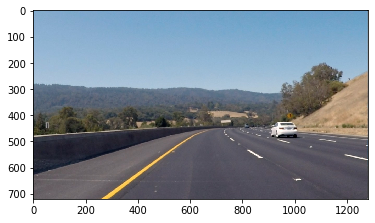

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

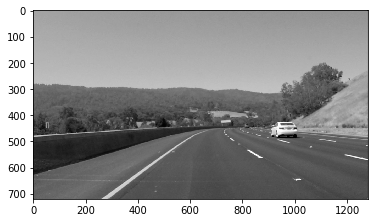

In [10]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="notebook_ims/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

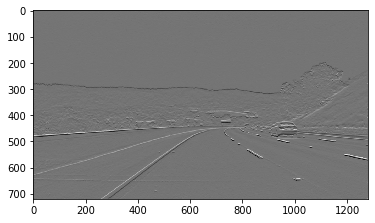

In [11]:
# Create a custom kernel
gray1 = gray.astype("float32")/255


# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray1, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



In [16]:
import torch
#filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
filter_vals = sobel_y

filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

#plot original image
gray_img = gray
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get all the layers 
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of the activated conv layer
viz_layer(activated_layer)

OSError: [WinError 1455] El archivo de paginación es demasiado pequeño para completar la operación